# ESL calculations
***Code prepared by Alessio Rovere 
Contact: alessio.rovere@unive.it***

This script calculates global mean sea level from paleo RSL data and estimates of GIA and vertical land motions for two sea level indicators, and compares the results to a set of reference values. For each indicator, the following values are required:

1. Paleo Relative Sea Level (RSL) and associated uncertainty.
2. Glacial Isostatic Adjustment (GIA) prediction and associated standard deviation
3. Vertical land motion (VLM) rate and associated uncertainty
4. Age and associated uncertainty

In [13]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
from matplotlib.patches import Ellipse
from matplotlib.patches import Rectangle

font = {'size'   : 18}
matplotlib.rc('font', **font)

## RSL indicator 1
Data for the first RSL indicator.

In [14]:
Location_name1='Site 1'
#Insert data here (mean and standard deviation)
RSL1mu = 36.2 #meters #e.g. = 36.2
RSL1sd = 2.5 #meters #e.g. = 2.5

GIA1mu = -14.6 #meters #e.g. = -14.6
GIA1sd = 3.2 #meters #e.g. = 3.2

VLR1mu = 4.5 #m/Ma #e.g. = 4.5
VLR1sd = 2.2 #m/Ma #e.g. = 2.2

Age1mu = 4.96 #Ma #e.g. = 4.96
Age1sd = 0.135 #Ma #e.g. = 0.135

## RSL indicator 2
Data for the second RSL indicator.

In [15]:
Location_name2='Site 2'
#Insert data here (mean and standard deviation)
RSL2mu = 35.1 #meters #e.g. = 35.1
RSL2sd = 2.2 #meters #e.g. = 2.2

GIA2mu = -9.6 #meters #e.g. = -9.6
GIA2sd = 1.6 #meters #e.g. = 1.6

VLR2mu = 4.6 #m/Ma #e.g. = 4.6
VLR2sd = 7.8 #m/Ma #e.g. = 7.8

Age2mu= 4.58 #Ma #e.g. = 4.58
Age2sd= 0.15 #Ma #e.g. = 0.15

# Reference data
Reference data to plot on the graph together with the two indicators.

In [20]:
Reference_location='Ref site'
Low_ref=10.6 #meters #e.g. = 10.6
Avg_ref=25.1 #meters #e.g. = 25.1
High_ref=28.3 #meters #e.g. = 28.3

Age_ref=4.39 #Ma #e.g. = 4.39
Age_ref_sd=0.195 #Ma #e.g. = 0.195
Agemin=Age_ref-Age_ref_sd
Agemax=Age_ref+Age_ref_sd

# Calculate and plot ESL

In [21]:
VLM1mu=VLR1mu*Age1mu
VLM1sd=np.abs(VLM1mu)*(np.sqrt(np.square(VLR1sd/VLR1mu)+np.square(Age1sd/Age1mu)))
ESL1mu=RSL1mu-GIA1mu-VLM1mu
ESL1sd=np.sqrt(np.square(RSL1sd)+np.square(GIA1sd)+np.square(VLM1sd))

VLM2mu=VLR2mu*Age2mu
VLM2sd=np.abs(VLM2mu)*(np.sqrt(np.square(VLR2sd/VLR2mu)+np.square(Age2sd/Age2mu)))
ESL2mu=RSL2mu-GIA2mu-VLM2mu
ESL2sd=np.sqrt(np.square(RSL2sd)+np.square(GIA2sd)+np.square(VLM2sd))

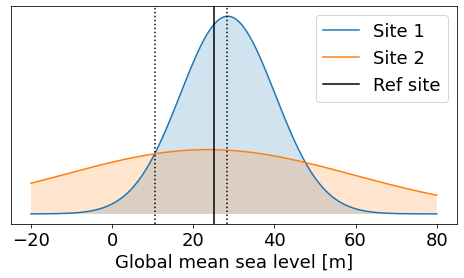

In [22]:
#Sea Level Plots
x = np.linspace(-20, 80, 1000)
y = scipy.stats.norm.pdf(x,ESL1mu,ESL1sd)
y2 = scipy.stats.norm.pdf(x,ESL2mu,ESL2sd)
fig, ax = plt.subplots(1,figsize=(8,4))
ax.plot(x, y,label=Location_name1)
ax.plot(x, y2,label=Location_name2)
ax.fill_between(x, y, alpha=0.2)
ax.fill_between(x, y2, alpha=0.2)
ax.set_xlabel('Global mean sea level [m]')
ax.set_yticks([]) 
plt.axvline(x=Low_ref, color='k', linestyle='dotted')
plt.axvline(x=Avg_ref, color='k',label=Reference_location)
plt.axvline(x=High_ref, color='k', linestyle='dotted')
ax.legend(loc='best')
plt.savefig('GMSL.svg')  
plt.show()

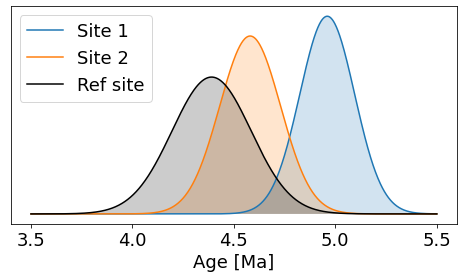

In [24]:
#Age Plots
x = np.linspace(3.5, 5.5, 1000)
y = scipy.stats.norm.pdf(x,Age1mu,Age1sd)
y2 = scipy.stats.norm.pdf(x,Age2mu,Age2sd)
y3 = scipy.stats.norm.pdf(x,Age_ref,Age_ref_sd)

fig, ax = plt.subplots(1,figsize=(8,4))
ax.plot(x, y,label=Location_name1)
ax.plot(x, y2,label=Location_name2)
ax.plot(x, y3,label=Reference_location,color='k')

ax.fill_between(x, y, alpha=0.2)
ax.fill_between(x, y2, alpha=0.2)
ax.fill_between(x, y3, alpha=0.2,facecolor='black')

ax.set_xlabel('Age [Ma]')
ax.set_yticks([]) 
ax.legend(loc='best')
plt.savefig('age.svg')  
plt.show()